# PACMANN - *Final Project* Kelas *Probability*

Oleh: Denny Dewanta

**Tools:** Python & MySQL (screenshot queries MySQL tersedia di notebook ini). Tools yang digunakan tergantung efektivitas kode/query pada kondisi/pertanyaan terkait.

## Import Dataset

In [159]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from scipy.stats import levene

In [160]:
df = pd.read_csv("insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [161]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Pada MySQL sudah ter-import dengan membuat schema, database, dan tabel bernama insurance pada MySQL Workbench. Hasil terdapat pada gambar di bawah ini:

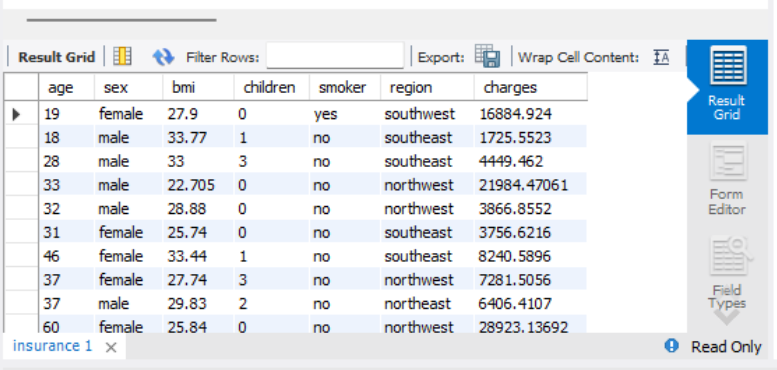

## 1. Descriptive Statistic Analysis

Pada analisis ini dilakukan peninjauan persebaran data, rata-rata, dan hal lainnya yang bisa didapatkan secara deskriptif pada data. Dipilih minimal lima pertanyaan untuk menjawab beberapa hal terkait descriptive statistic analysis ini.

### 1.1 Rata-rata umur pengguna

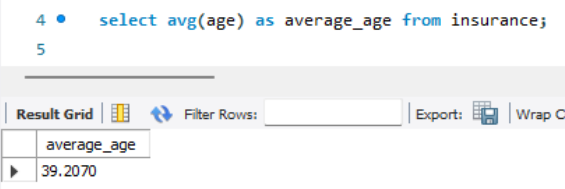

Jadi, rata-rata umur pengguna adalah 39,207

### 1.2 Rata-rata bmi pengguna yang merokok

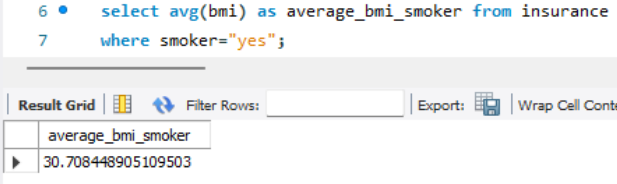

Jadi, rata-rata BMI pengguna yang merokok adalah 30,708.

### 1.7 Mana yang lebih tinggi, rata-rata tagihan kesehatan perokok atau non-perokok?

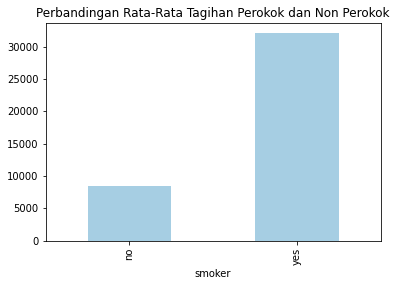

In [163]:
bars = np.round(df[['charges', 'smoker']].groupby(['smoker'])['charges'].mean(), 2).plot(kind='bar',
                                                                                  title='Perbandingan Rata-Rata Tagihan Perokok dan Non Perokok')

Rata-rata tagihan kesehatan perokok jauh lebih besar daripada non-perokok.

### 1.9 BMI mana yang lebih tinggi, seorang laki-laki atau perempuan?

In [164]:
np.round(df[['bmi', 'sex']].groupby(['sex'])['bmi'].mean(), 2)

sex
female    30.38
male      30.94
Name: bmi, dtype: float64

### 1.10 BMI mana yang lebih tinggi, seseorang perokok atau non perokok?

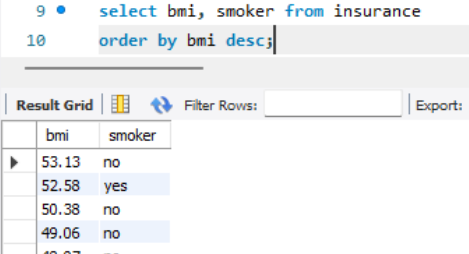

Jadi, BMI yang tertinggi dipegang oleh non perokok. Namun, jika ditanya rata-rata BMI pada perokok dan non perokok, maka:

In [165]:
np.round(df[['bmi', 'smoker']].groupby(['smoker'])['bmi'].mean(), 2)

smoker
no     30.65
yes    30.71
Name: bmi, dtype: float64

*Karena jarak antara rata-rata smoker dan non-smoker tidak berbeda jauh, maka tidak divisualisasikan*

Jadi, rata-rata BMI antara smoker dan non-smoker tidak berbeda jauh, yaitu smoker memiliki rata-rata BMI 30,71 sedangkan non-smoker 30,65. BMI perokok lebih tinggi.

## Analisis Variabel Kategorik (PMF)

### 2.3 Apakah setiap region memiliki proporsi data banyak orang yang sama?

In [166]:
region_prop = (df['region']).value_counts()
print("Jumlah pengguna tiap region:")
print(region_prop)

Jumlah pengguna tiap region:
southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


[Text(0.5, 1.0, 'Proporsi Data Orang pada Setiap Region')]

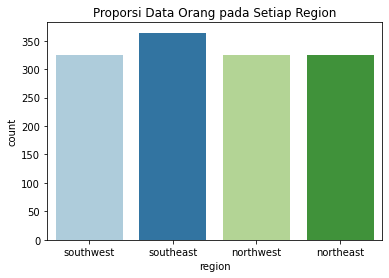

In [167]:
# Palette agar lebih nyaman dilihat saja
sns.set_palette("Paired")

# Plotbb
sns.countplot(x=df['region']).set(title='Proporsi Data Orang pada Setiap Region')

Ternyata, proporsi southeast jauh lebih tinggi pada dataset.

### 2.4 Mana yang lebih tinggi proporsi perokok atau non perokok?

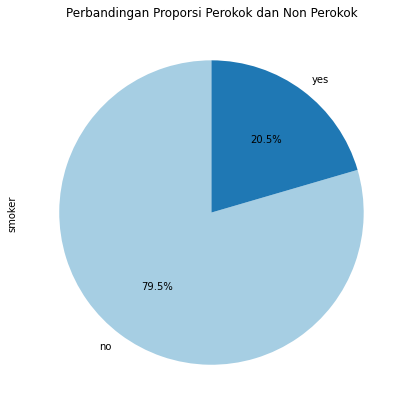

In [168]:
# Melihat perbandingan perokok dan non perokok
fig1 = df['smoker'].value_counts().plot(kind='pie', startangle=90, title='Perbandingan Proporsi Perokok dan Non Perokok',
                                      figsize=(7,7), autopct='%1.1f%%')

Proporsi non-perokok jauh lebih besar pada dataset dengan persentase 79,5%, sedangkan proporsi perokok adalah 20,5%

### 2.5 Berapa peluang seseorang tersebut adalah perempuan diketahui dia adalah perokok?

In [169]:
smoker_f = df['smoker'].where(df['sex']=='female').value_counts()
p_smoker_f = smoker_f[1] / smoker_f.sum()
print("Peluang jenis kelamin perempuan diketahui perokok adalah sebesar {}".format(np.round(p_smoker_f, 2)))

Peluang jenis kelamin perempuan diketahui perokok adalah sebesar 0.17


### 2.6 Berapa peluang seseorang tersebut adalah laki-laki diketahui dia adalah perokok?

In [170]:
smoker_m = df['smoker'].where(df['sex']=='male').value_counts()
p_smoker_m = smoker_m[1] / smoker_m.sum()
print("Peluang jenis kelamin perempuan diketahui perokok adalah sebesar {}".format(np.round(p_smoker_m, 2)))

Peluang jenis kelamin perempuan diketahui perokok adalah sebesar 0.24


### 2.7 Bagaimana bentuk distribusi peluang besar tagihan dari tiap-tiap region?

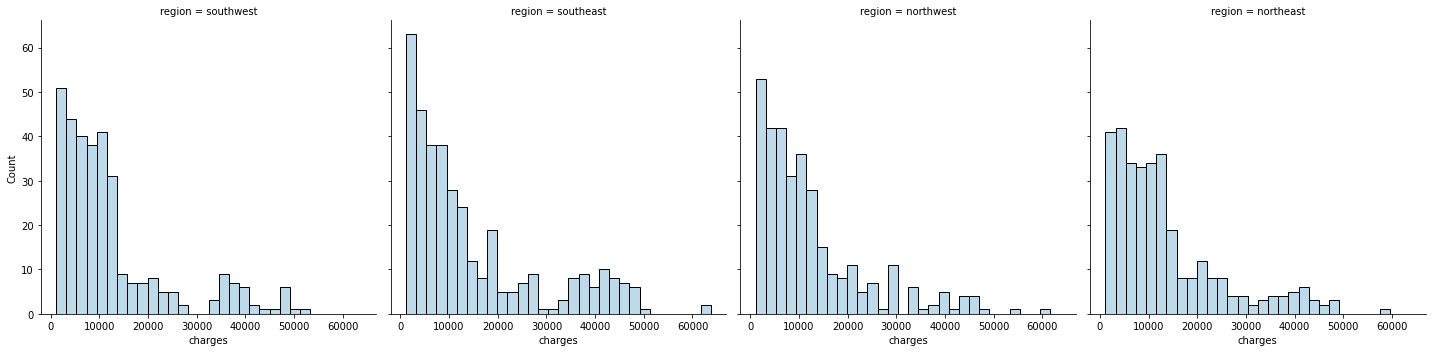

In [171]:
sns.displot(df, x='charges', col='region')

## 3. Analisis Variabel Kontinu

### 3.1 Analisis Variabel Kontinu 1

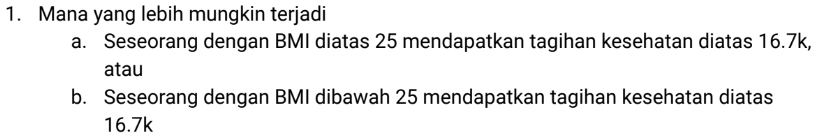

In [172]:
# Sample dengan charges > 16.7K
sample = df[df['charges']>16700].value_counts().sum()

# Jumlah orang untuk poin 1a dan 1b
jumlah_up = df.where((df['bmi']>25) & (df['charges']>16700)).value_counts().sum()
jumlah_down = df.where((df['bmi']<25) & (df['charges']>16700)).value_counts().sum()

# Probability
p_up = jumlah_up/sample
p_down = jumlah_down/sample

# Print
print("Probability orang dengan BMI > 25 dan tagihan kesehatan > 16.7K adalah {}".format(np.round(p_up, 2)))
print("Probability orang dengan BMI < 25 dan tagihan kesehatan > 16.7K adalah {}".format(np.round(p_down, 2)))

Probability orang dengan BMI > 25 dan tagihan kesehatan > 16.7K adalah 0.85
Probability orang dengan BMI < 25 dan tagihan kesehatan > 16.7K adalah 0.15


**Jadi, yang lebih mungkin adalah orang dengan BMI di atas 25 dan tagihan kesehatan di atas 16,7K.**

### 3.2 Analisis Variabel Kontinu 2

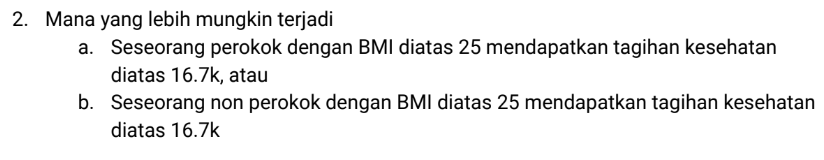

In [173]:
# Sample masih menggunakan pada point 3.1 sebelumnya karena sama

# Jumlah orang untuk poin 2a dan 2b
jumlah_yes = df.where((df['smoker']=='yes') & (df['bmi']>25) & (df['charges']>16700)).value_counts().sum()
jumlah_no = df.where((df['smoker']=='no') & (df['bmi']>25) & (df['charges']>16700)).value_counts().sum()

# Probability
p_yes = jumlah_yes/sample
p_no = jumlah_no/sample

# Print
print("Probability orang perokok dengan BMI > 25 dan tagihan kesehatan > 16.7K adalah {}".format(np.round(p_yes, 2)))
print("Probability orang non perokok dengan BMI > 25 dan tagihan kesehatan > 16.7K adalah {}".format(np.round(p_no, 2)))

Probability orang perokok dengan BMI > 25 dan tagihan kesehatan > 16.7K adalah 0.64
Probability orang non perokok dengan BMI > 25 dan tagihan kesehatan > 16.7K adalah 0.2


**Jadi, yang lebih mungkin adalah orang perokok dengan BMI di atas 25 dan tagihan kesehatan di atas 16,7K.**

## 4. Analisis Korelasi Variabel

<AxesSubplot:title={'center':'Pearson Correlation pada Dataset'}>

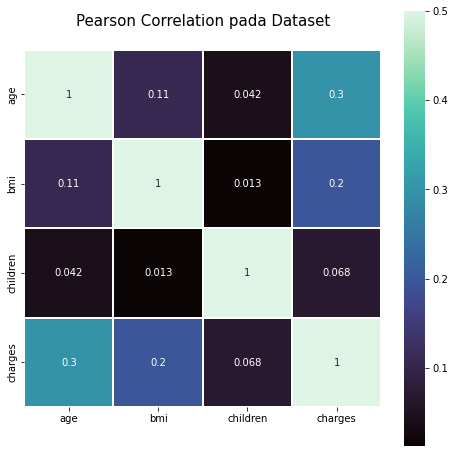

In [174]:
data_corr = df[['age', 'bmi', 'children', 'charges']].corr(method='pearson')
colormap = plt.cm.RdBu
plt.figure(figsize=(8,8))
plt.title('Pearson Correlation pada Dataset', y=1.05, size=15)
sns.heatmap(data_corr,linewidths=0.1,vmax=0.5, 
            square=True, cmap='mako', linecolor='white', annot=True)

## 5.Pengujian Hipotesis

In [175]:
# Function untuk keputusan
alpha = 0.05
def result(p_value):
    if p_value <= alpha: 
        print('Tolak H0') 
    else: 
        print('Gagal tolak H0') 

### 5.2 Proporsi perokok laki laki lebih besar dari perempuan

In [176]:
cont = pd.crosstab(df['smoker'],df['sex'])
value = np.array([cont.iloc[0][0:2].values,cont.iloc[1][0:2].values])

# Memanggil nilai Chi Square
c, p, dof, expected = stats.chi2_contingency(value)
print('P-value:',p)
result(p)

P-value: 0.006548143503580696
Tolak H0


### 5.5 Tagihan kesehatan laki-laki lebih besar dari perempuan

In [177]:
male = df[df['sex']=='male']['charges']
female = df[df['sex']=='female']['charges']
stat,p = levene(male,female)
print('P-value:',p)
result(p)

P-value: 0.0016808765833903443
Tolak H0


In [178]:
# Uji T arah kanan
st,p = stats.ttest_ind(male,female)
print('P-value:',(p/2))
result(p/2)

P-value: 0.01806636050296488
Tolak H0
